# Unsupervised learning
## Chapter 6
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 6 Section 1 - Unsupervised learning of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to work with unsupervised learning models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
%matplotlib inline

Provide data from the Palmer Archipelago (Antarctica) penguin dataset.

License: CC0

* Sourced from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

* Raw data used: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

This module contains one pandas Dataframe: data.

In [197]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv" 
penguins = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
penguins.dropna(subset=['body_mass_g'], inplace=True) #Clean empty fields before training 
penguins.dropna(subset=['sex'], inplace=True) #Clean empty fields before training
#predictors = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
predictors = ['bill_length_mm', 'body_mass_g']
penguinsc = penguins.copy()
penguins = penguins[predictors]
#penguins.sex.replace(['MALE', 'FEMALE'], [0,1], inplace=True)
penguins

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
4,36.7,3450.0
5,39.3,3650.0
...,...,...
338,47.2,4925.0
340,46.8,4850.0
341,50.4,5750.0
342,45.2,5200.0


In [199]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(penguins)
scaled


array([[0.25454545, 0.29166667],
       [0.26909091, 0.30555556],
       [0.29818182, 0.15277778],
       [0.16727273, 0.20833333],
       [0.26181818, 0.26388889],
       [0.24727273, 0.25694444],
       [0.25818182, 0.54861111],
       [0.32727273, 0.13888889],
       [0.23636364, 0.30555556],
       [0.09090909, 0.47222222],
       [0.16363636, 0.27777778],
       [0.24      , 0.20833333],
       [0.37818182, 0.5       ],
       [0.08363636, 0.17361111],
       [0.50545455, 0.41666667],
       [0.20727273, 0.19444444],
       [0.20363636, 0.25      ],
       [0.13818182, 0.30555556],
       [0.22181818, 0.34722222],
       [0.24363636, 0.30555556],
       [0.11636364, 0.30555556],
       [0.30909091, 0.23611111],
       [0.30545455, 0.13888889],
       [0.21090909, 0.125     ],
       [0.30545455, 0.34722222],
       [0.26909091, 0.15277778],
       [0.18545455, 0.33333333],
       [0.26909091, 0.16666667],
       [0.32      , 0.33333333],
       [0.15636364, 0.17361111],
       [0.

In [200]:
k = 3
kmeans = KMeans(n_clusters=k)
c_prediction = kmeans.fit_predict(scaled)
c_prediction


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [201]:
kmeans.n_iter_
kmeans.inertia_
kmeans.cluster_centers_

array([[0.57451147, 0.69321132],
       [0.24069738, 0.26598174],
       [0.59245455, 0.32994792]])

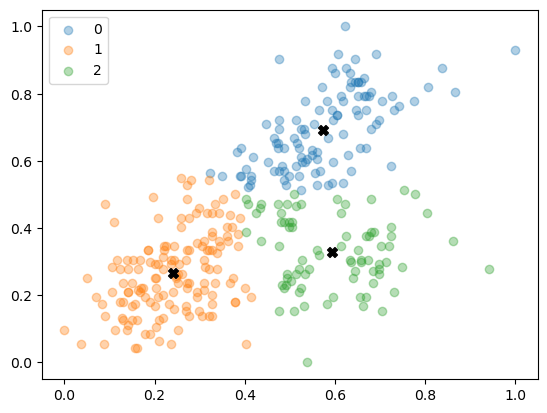

In [208]:
centroids = kmeans.cluster_centers_
num_labels = np.unique(c_prediction)

 
for i in num_labels:
   plt.scatter(scaled[c_prediction == i][:,0] , scaled[c_prediction == i][:,1], alpha=0.35)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k', marker='X')
plt.legend(u_labels)
plt.show()

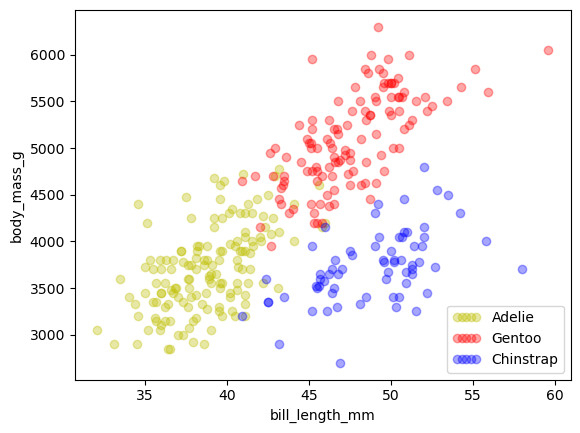

In [78]:
ax = penguinsc[penguinsc.species == 'Adelie'].plot(x='bill_length_mm', y='body_mass_g', style='yo', label='Adelie', alpha=0.35)
ax = penguinsc[penguinsc.species == 'Gentoo'].plot(x='bill_length_mm', y='body_mass_g', style='ro', label='Gentoo', alpha=0.35, ax=ax)
ax = penguinsc[penguinsc.species == 'Chinstrap'].plot(x='bill_length_mm', y='body_mass_g', style='bo', label='Chinstrap'   , alpha=0.35, ax=ax)
ax.legend('Adelie Gentoo Chinstrap'.split(), numpoints=5, loc='lower right') 
_ = ax.set_ylabel('body_mass_g') # Stacked Visualization

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


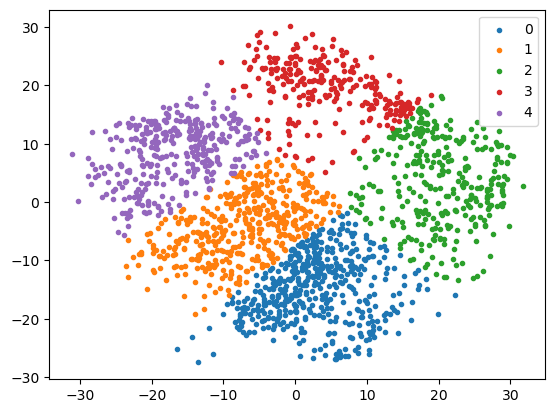

In [210]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i, marker = '.')
plt.legend()
plt.show()